In [1]:
import sys
import os

sys.path.append('../')

%load_ext autoreload
%autoreload 2
%matplotlib inline



In [2]:
import numpy as np

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

from skimage.io import imread

from gen.load_data import load_data

In [3]:
from sklearn.utils import shuffle

train_df, valid_df, test_df = load_data('../data')

train_df = shuffle(train_df)
valid_df = shuffle(valid_df)

print(train_df.head())


                                                image                   id  \
2364                  ../data/Train/CameraRGB/395.png                  395   
4582  ../data/Train/CameraRGB/episode_0011_000204.png  episode_0011_000204   
3403  ../data/Train/CameraRGB/episode_0003_000106.png  episode_0003_000106   
3438  ../data/Train/CameraRGB/episode_0012_000199.png  episode_0012_000199   
956   ../data/Train/CameraRGB/episode_0005_000087.png  episode_0005_000087   

                                                label  
2364                  ../data/Train/CameraSeg/395.png  
4582  ../data/Train/CameraSeg/episode_0011_000204.png  
3403  ../data/Train/CameraSeg/episode_0003_000106.png  
3438  ../data/Train/CameraSeg/episode_0012_000199.png  
956   ../data/Train/CameraSeg/episode_0005_000087.png  


In [5]:
from models.segnet import model_segnet

model = model_segnet(3, image_shape=(384, 384, 3))
model.summary()

Build enceder done..
Build decoder done..
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 384, 384, 3)  0                                            
__________________________________________________________________________________________________
conv2d_27 (Conv2D)              (None, 384, 384, 64) 1792        input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_27 (BatchNo (None, 384, 384, 64) 256         conv2d_27[0][0]                  
__________________________________________________________________________________________________
activation_27 (Activation)      (None, 384, 384, 64) 0           batch_normalization_27[0][0]     
___________________________________________________________________

In [6]:
from gen.generators import train_and_lab_gen_func, test_and_lab_gen_func

BATCH_SIZE = 8
model_dir = '../saved_models/segnet_extended/'

train_gen = train_and_lab_gen_func(train_df, image_size=(600, 800), target_size=(384, 384), batch_size = BATCH_SIZE)
valid_gen = test_and_lab_gen_func(valid_df, image_size=(600, 800), target_size=(384, 384), batch_size = BATCH_SIZE)


In [7]:
from train import weighted_categorical_crossentropy
from keras.utils.training_utils import multi_gpu_model

weights = np.array([10, 5, 1])

gpus = 2

model_gpu = multi_gpu_model(model, gpus)
# model_gpu.__setattr__('callback_model',model)

model_gpu.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [8]:
from train import train_nn

m = train_df.shape[0]
history = train_nn(model_gpu, 
                   train_gen, 
                   valid_gen, 
                   training_size=m, 
                   batch_size=BATCH_SIZE,
                   validation_size=valid_df.shape[0],
                   output_path=model_dir, 
                   epochs=100,
                   gpus = 2)

/home/faisal/anaconda3/envs/ai/lib/python3.6/site-packages/keras/engine/training.py:2095: UserWarning: Using a generator with `use_multiprocessing=True` and multiple workers may duplicate your data. Please consider using the`keras.utils.Sequence class.
  UserWarning('Using a generator with `use_multiprocessing=True`'


## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced anyways
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
## Ignore next message from keras, values are replaced anyways
Found 0 images belonging to 0 classes.
Reinserting dataframe: 500 images
Found 0 images belonging to 0 classes.
## Ignore next message from keras, values are replaced any

301/301 [==============================] - 340s 1s/step - loss: 0.0286 - acc: 0.9901 - val_loss: 0.0405 - val_acc: 0.9862

Epoch 00030: val_loss improved from 0.04768 to 0.04050, saving model to ../saved_models/segnet_extended//model.hdf5
Epoch 31/100
301/301 [==============================] - 337s 1s/step - loss: 0.0227 - acc: 0.9921 - val_loss: 0.0452 - val_acc: 0.9852

Epoch 00031: val_loss did not improve
Epoch 32/100
301/301 [==============================] - 335s 1s/step - loss: 0.0231 - acc: 0.9919 - val_loss: 0.0449 - val_acc: 0.9860

Epoch 00032: val_loss did not improve
Epoch 33/100
301/301 [==============================] - 336s 1s/step - loss: 0.0234 - acc: 0.9917 - val_loss: 0.0702 - val_acc: 0.9756

Epoch 00033: val_loss did not improve
Epoch 34/100
301/301 [==============================] - 332s 1s/step - loss: 0.0268 - acc: 0.9905 - val_loss: 0.0607 - val_acc: 0.9809

Epoch 00034: val_loss did not improve
Epoch 35/100
301/301 [==============================] - 335s 1s/s

Epoch 75/100
301/301 [==============================] - 336s 1s/step - loss: 0.0176 - acc: 0.9937 - val_loss: 0.0501 - val_acc: 0.9828

Epoch 00075: val_loss did not improve
Epoch 76/100
301/301 [==============================] - 337s 1s/step - loss: 0.0167 - acc: 0.9940 - val_loss: 0.0430 - val_acc: 0.9867

Epoch 00076: val_loss did not improve
Epoch 77/100
301/301 [==============================] - 338s 1s/step - loss: 0.0182 - acc: 0.9935 - val_loss: 0.0480 - val_acc: 0.9849

Epoch 00077: val_loss did not improve
Epoch 78/100
301/301 [==============================] - 339s 1s/step - loss: 0.0174 - acc: 0.9937 - val_loss: 0.0393 - val_acc: 0.9868

Epoch 00078: val_loss did not improve
Epoch 79/100
301/301 [==============================] - 337s 1s/step - loss: 0.0162 - acc: 0.9941 - val_loss: 0.0453 - val_acc: 0.9863

Epoch 00079: val_loss did not improve
Epoch 80/100
301/301 [==============================] - 336s 1s/step - loss: 0.0156 - acc: 0.9944 - val_loss: 0.0396 - val_acc: 0.

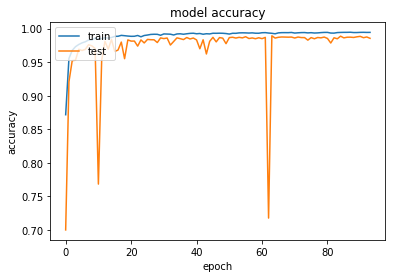

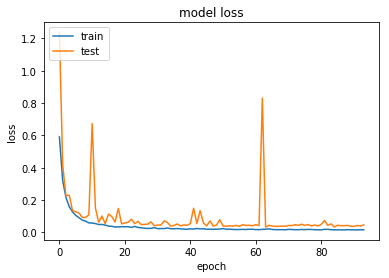

In [9]:
# # summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [10]:
model.save('../saved_models/segnet_extended/model_saved.h5')